## 0. Imports & Notebook Setup

In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#import function from implementation.py
from implementation import *

%load_ext autoreload
%autoreload 2

In [2]:
 %reload_ext autoreload

In [3]:
#seaborn only for visualization purpose
import seaborn as sns

#### 0.1 Sound notification for end of computing

In [4]:
# IF USING CODING PLAFTORM OTHER JUPYTER
#winsound if you want to make a beep once the function finished to run
import winsound

In [5]:
# IF USING JUPYTER
from IPython.display import Audio
sound_file = './sound/beep.wav' #Insert sound file

# Command to run sound using jupyter
#Audio(sound_file, rate = 0, autoplay=True)

## 1. Path and data loading

In [6]:
DATA_TRAIN_PATH = './../data/train.csv'
DATA_TEST_PATH = './../data/test.csv'
OUTPUT_PATH ='./../out'

#### 1.2 Load the training data into feature matrix, class labels, and event ids:

In [7]:
# LOAD PREDEFINED UTILITY FUNCTIONS FOR PROJECT
from proj1_helpers import *

# Load data for train
# y : variable to predict
# X : predicting variables, not augmented yet (TODO : add column of ones)? 
#[Note:use build_poly to augment the data, degree 1 for juste a columns of one]
# ids : variable ids
y, X, ids = load_csv_data(DATA_TRAIN_PATH)
y.shape , X.shape, ids.shape

((250000,), (250000, 30), (250000,))

In [8]:
# Addition of offset term to X
tX = np.c_[np.ones(X.shape[0]), X]
tX.shape

(250000, 31)

### Do your thing crazy machine learning thing here :) ...

## 2. Check of function implementation

In [9]:
#primary test using least square
w_ls,loss_ls = least_squares(y, tX)
w_ls2, loss_ls2 = least_squares_A(y, tX)

#Comparison of implementation
print(loss_ls - loss_ls2)

-1.1102230246251565e-16


In [10]:
# classic gradient descent
w_gd,loss_gd = least_squares_GD(y, tX, initial_w=w_ls,max_iters=250, gamma=10**-10)
w_gd_A, loss_gd_A = least_squares_GD_A(y, tX, initial_w = w_ls, max_iters=250, gamma=10**-10)

#comparison of results
print(loss_gd, loss_gd_A)
print(loss_gd - loss_gd_A)

0.3394455984893304 0.33944559848933054
-1.1102230246251565e-16


## 3. Exploration of data

In [11]:
#DONE : Explore data distribution, normal/log scale
#DONE : Integrate function to split data into training/testing sets
#TODO : Answer questions :
#   - What are the most impactful features
#   - Do we need to use augmentation -> seems to work well at degree 3 (0,1,2)
#TODO : Try simple approahces such as least squares
#TODO : Integrate cross validation to determine hyperparameters
#DONE : reduce data using PCA

In [11]:
X

array([[ 138.47 ,   51.655,   97.827, ...,    1.24 ,   -2.475,  113.497],
       [ 160.937,   68.768,  103.235, ..., -999.   , -999.   ,   46.226],
       [-999.   ,  162.172,  125.953, ..., -999.   , -999.   ,   44.251],
       ...,
       [ 105.457,   60.526,   75.839, ..., -999.   , -999.   ,   41.992],
       [  94.951,   19.362,   68.812, ..., -999.   , -999.   ,    0.   ],
       [-999.   ,   72.756,   70.831, ..., -999.   , -999.   ,    0.   ]])

There is a lot of "-999" (aka error data) 

What if we get rid of all rows containing at least one "-999" ?

In [12]:
# Get mask and test it
isNan = (X == -999)
mask = ~isNan.any(axis = 1)
mask

array([ True, False, False, ..., False, False, False])

In [13]:
# Filter out all rows with error and count result
naive = X[mask, :]

nb_rows0 = X.shape[0]
nb_rowsNaive = naive.shape[0]

print("Remaining rows: {remainig_percentage}%".
      format(remainig_percentage = int(100 * nb_rowsNaive / nb_rows0)))

Remaining rows: 27%


Well, this is bad, let's have a closer look at the features:

In [14]:
# Get mask of emptyness
emptyCol = (X == -999)

# And 
nb_rows = X.shape[0]

# Look up for percentage of -999 per column:
percentError = 100*np.sum(emptyCol, axis =0)/nb_rows
percentError 

array([15.2456,  0.    ,  0.    ,  0.    , 70.9828, 70.9828, 70.9828,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    , 70.9828,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    , 39.9652, 39.9652, 39.9652, 70.9828, 70.9828,
       70.9828,  0.    ])

(array([19.,  0.,  1.,  0.,  0.,  3.,  0.,  0.,  0.,  7.]),
 array([ 0.     ,  7.09828, 14.19656, 21.29484, 28.39312, 35.4914 ,
        42.58968, 49.68796, 56.78624, 63.88452, 70.9828 ]),
 <a list of 10 Patch objects>)

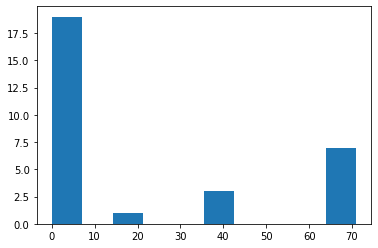

In [15]:
plt.hist(percentError )

Some columns have more than ~70% of empty values (7), others with ~39% (3).

Let's get rid of them and see how much data is left after cleaning

In [16]:
# Creates two data set.
# One with get rid of columns where more than 70% of empty 
# One with get rid of columns where more than 39% of empty 
lt70 = X[:, 100*np.sum(emptyCol/nb_rows, axis =0) < 70]
lt39 = X[:, 100*np.sum(emptyCol/nb_rows, axis =0) < 39]
lt70.shape, lt39.shape

((250000, 23), (250000, 20))

In [17]:
X_clean,y_clean =  remainingRow(X,y)
lt70_clean, y_70_clean = remainingRow(lt70,y)
lt39_clean , y_39_clean = remainingRow(lt39,y)

Origin: (250000, 30) 
 Remaining: (68114, 30) 
  Survivors:27% 

Origin: (250000, 23) 
 Remaining: (138096, 23) 
  Survivors:55% 

Origin: (250000, 20) 
 Remaining: (211886, 20) 
  Survivors:84% 



In [18]:
#standardize the resulting datasets
lt70_s, lt39_s = standardize(lt70_clean), standardize(lt39_clean), 

In [ ]:
####################################################################

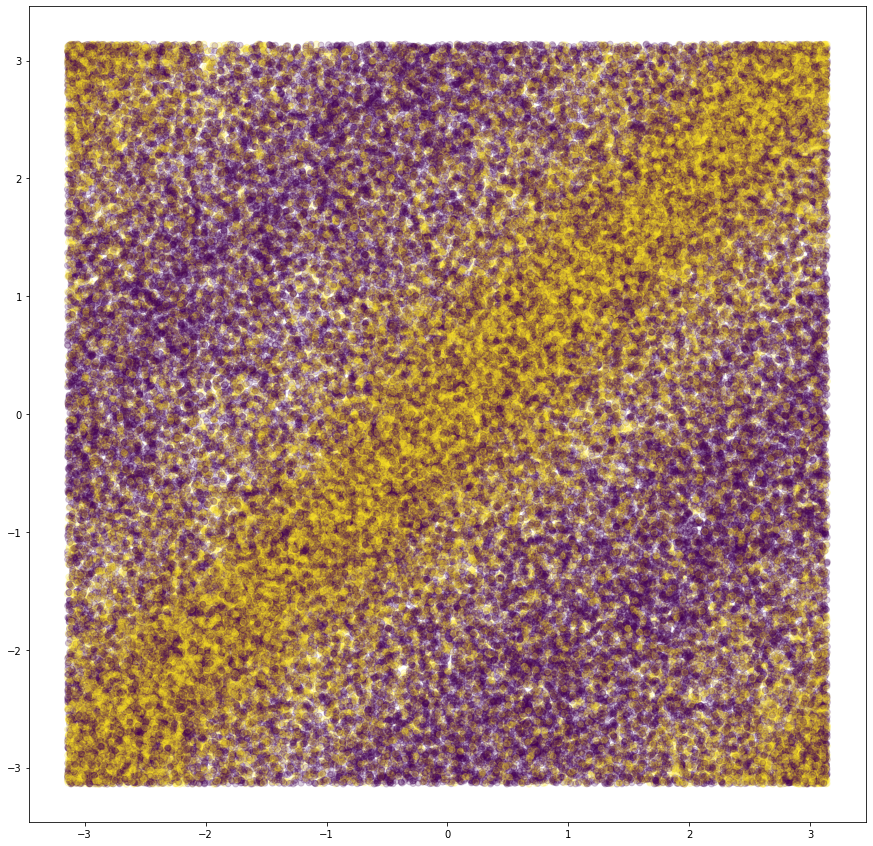

In [470]:
plt.figure(figsize = (15,15))
plt.scatter( (lt70_clean[:,14]) , (lt70_clean[:,16]), c =  y_70_clean , alpha = 0.2  )

In [76]:
w,l= least_squares( y_70_clean , test_set ,  )

In [78]:
yApprox =  test_set @ w
yApprox = np.sign(yApprox)
diff = y_70_clean - yApprox

np.unique( diff , return_counts = True )

(array([-2.,  0.,  2.]), array([19793, 94025, 24278], dtype=int64))

In [79]:
94025 / len(y_70_clean)

0.6808669331479551

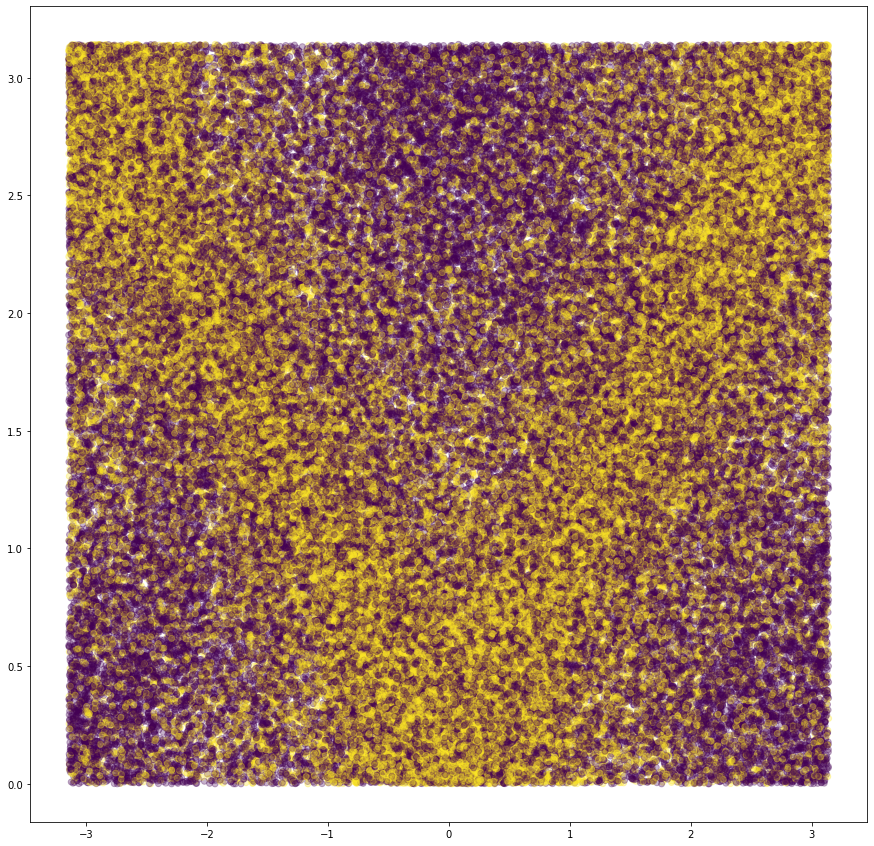

In [39]:
plt.figure(figsize = (15,15))
plt.scatter((lt70_clean[:,14])**1 ,  np.abs(lt70_clean[:,16])**1 , c =  y_70_clean , alpha = 0.3  )



In [ ]:
####################################################################

In [404]:
# 'TRAINING' -> amke the grif of proba according to var1, var2
def knn_grid( var1, var2 , y , n = 10 ):
    # create vector to cut both varaibles into linear pieces
    vec1 = np.linspace(start=np.min(var1), stop=np.max(var1), num=n, endpoint=True,)
    vec2 = np.linspace(start=np.min(var2), stop=np.max(var2), num=n, endpoint=True,)
    #grid to store result according to the position
    grid = np.zeros( (n-1,n-1) )
    #regularization by the number of point to avoid outliers
    max_pts = 0
     #masks are used to get the set of point in the wanted subzone
    for i in range(len(vec1)-1):
        mask1 =  (var1 > vec1[i]) & (var1 < vec1[i+1])
        for j in range(len(vec2)-1):
            mask2 =  (var2 > vec2[j]) & (var2 < vec2[j+1])
            mask = (mask1 & mask2)
            #get the predictions for the subzone
            tmp_y = y[mask]
            #compute the score
            if( len(tmp_y)>0 ):
                mean = ( (tmp_y == 1).sum() ) 
            else: mean = 0.0 #default value is 0
            grid[i,j] = mean
            #find the maximum of point for 1 subzone
            if(len(tmp_y) > max_pts ): max_pts=len(tmp_y)
    #normalization
    grid = grid/max_pts
    grid /= np.max(grid)
    return grid,vec1,vec2,default

def knn_grid_smooth( var1, var2 , y , n = 10 , smooth=1 ):
    # create vector to cut both varaibles into linear pieces
    vec1 = np.linspace(start=np.min(var1), stop=np.max(var1), num=n, endpoint=True,)
    vec2 = np.linspace(start=np.min(var2), stop=np.max(var2), num=n, endpoint=True,) 
    #grid to store result according to the position
    grid = np.zeros( (n-1,n-1) )
    #regularization by the number of point to avoid outliers
    max_pts = 0
    #masks are used to get the set of point in the wanted subzone
    for i in range(len(vec1)-1):
        mask1 =  (var1 > vec1[ max( [i-smooth,0] ) ]) & (var1 < vec1[ min( [i+1+smooth,len(vec1)-1] ) ])
        for j in range(len(vec2)-1):
            mask2 =  (var2 > vec2[ max( [j-smooth,0] ) ]) & (var2 < vec2[ min( [j+1+smooth,len(vec2)-1] ) ])
            mask = (mask1 & mask2)
            #get the predictions for the subzone
            tmp_y = y[mask]
            #length/width -> used to regularize (otherwise edges are not scaled)
            diffI = min( [i+1+smooth,len(vec1)-1] ) - max( [i-smooth,0] ) 
            diffJ = min( [j+1+smooth,len(vec2)-1] ) - max( [j-smooth,0] )
            #compute the regularized score
            if( len(tmp_y)>0 ):
                mean = ( (tmp_y == 1).sum() ) / (diffI*diffJ) 
            else: mean = 0.0 #default value is 0
            grid[i,j] = mean
            #find the maximum of point for 1 subzone
            if(len(tmp_y) > max_pts ): max_pts=len(tmp_y)
    #normalization
    grid = grid/max_pts
    grid /= np.max(grid)
    return grid,vec1,vec2

# TEST -> predict the outcome from the grid of probability
def knn_grid_predict( var1, var2 , grid, vec1, vec2 ):
    #create the vector to return
    #default value is zero
    result = np.zeros( len(var1) )
    #find the points in the different defined subzone
    #and attribute them the associated value in grid
    for i in range(len(vec1)-1):
        mask1 =  (var1 > vec1[i]) & (var1 < vec1[i+1])
        for j in range(len(vec2)-1):
            mask2 =  (var2 > vec2[j]) & (var2 < vec2[j+1])
            mask = 1*(mask1 & mask2)
            result += mask * grid[i,j]
    return result
    

In [483]:
grid,vec1,vec2=knn_grid_smooth( (lt70_clean[:,4]) , (lt70_clean[:,3]) , y_70_clean  , n = 50,smooth=3)



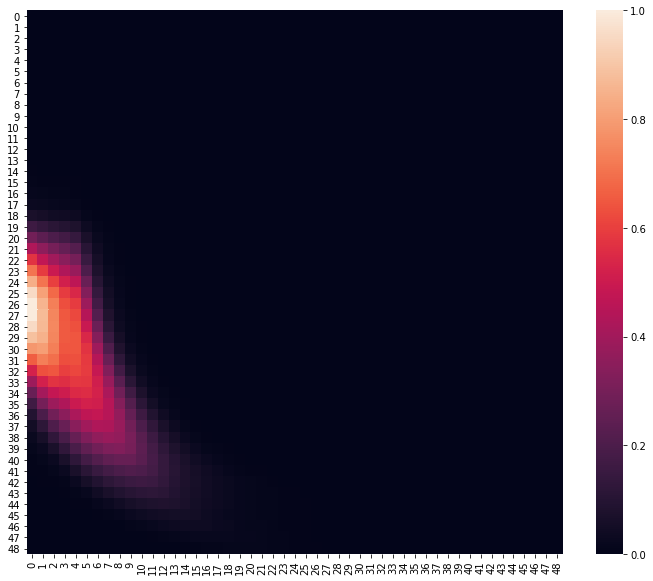

In [484]:
plt.figure(figsize=(12,10))
sns.heatmap(grid[::-1])

In [431]:
test_y = knn_grid_predict( (lt70_clean[:,14]) , (lt70_clean[:,16]) , grid, vec1, vec2 )

In [432]:
np.corrcoef((1+y_70_clean)/2 , 1*(test_y<0.5 ))

array([[ 1.       , -0.1138595],
       [-0.1138595,  1.       ]])

In [351]:
least_squares( y_70_clean, np.array([test_y]).T )

(array([0.03114334]), 0.4998429792213469)

In [350]:
test_y.min()

0.0

In [ ]:
####################################################################

In [20]:
#save dataset
np.save( 'lt70_std' , lt70_s )
np.save( 'lt39_std' , lt39_s )

In [21]:
#just test loading (to delete)
load_70 = np.load( 'lt70_std.npy' )
load_70

array([[ 0.26606058,  0.44106901,  0.42852848, ...,  1.20579626,
         0.25276214, -0.10289532],
       [ 0.64024087,  0.99429156,  0.56099012, ...,  0.40775839,
         0.64656768, -0.76556394],
       [-0.54545447, -0.79077493, -0.51883672, ..., -1.34904499,
        -0.35228641,  0.68676896],
       ...,
       [ 0.1262447 , -1.10215456, -0.33190122, ..., -0.1987504 ,
         0.61071703,  4.1582262 ],
       [ 1.57428427,  0.29562705, -0.42882257, ...,  0.13446542,
         1.73201486,  0.49483728],
       [-0.28375977,  0.72784732, -0.11003778, ...,  1.00978696,
        -0.08368236, -0.80727195]])

from here we will use the lt70_s dataset

Explore data distribution

C:\anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


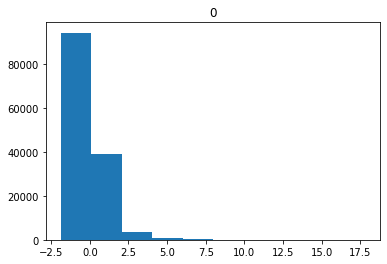

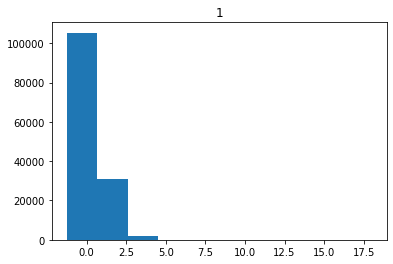

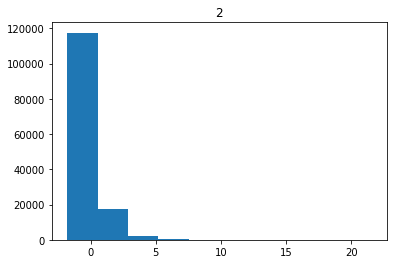

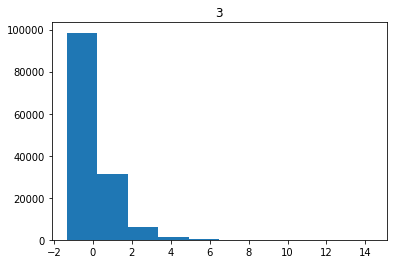

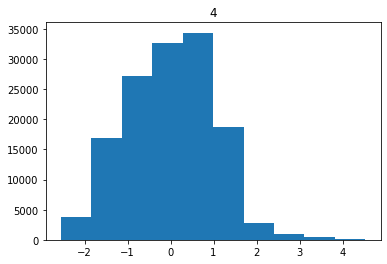

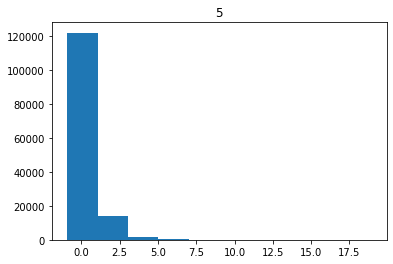

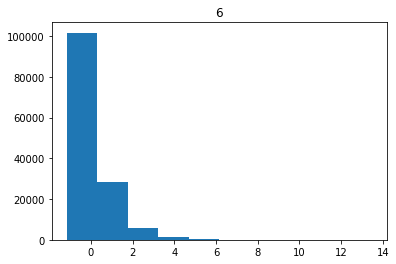

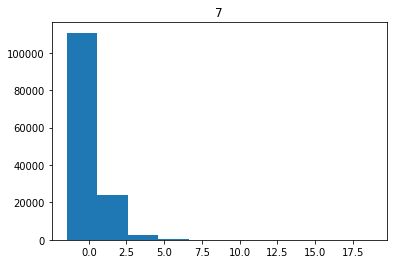

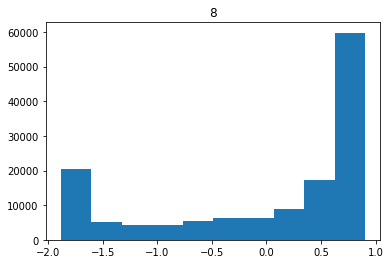

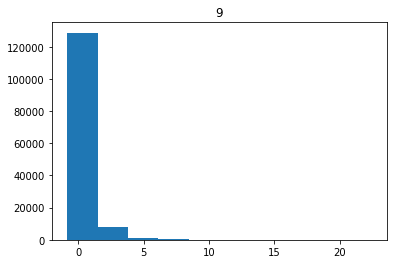

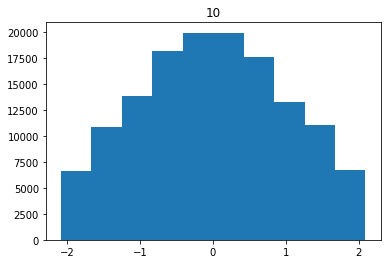

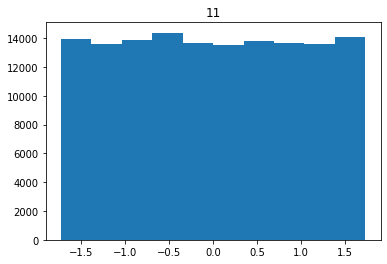

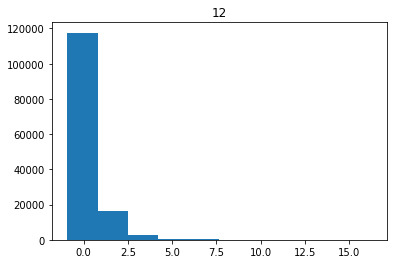

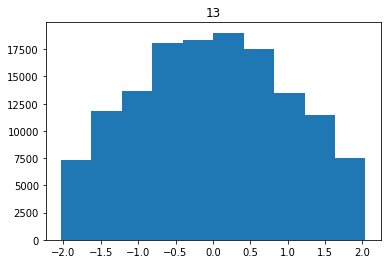

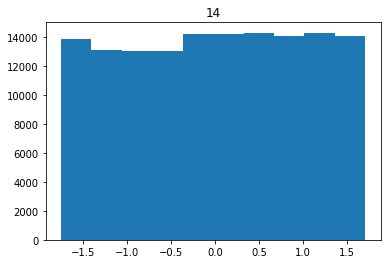

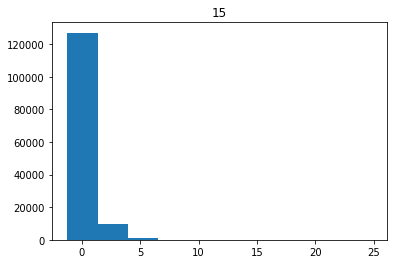

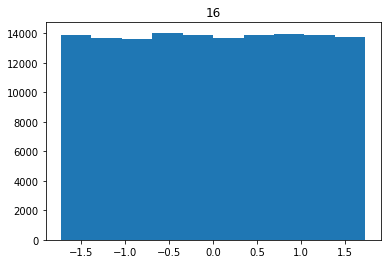

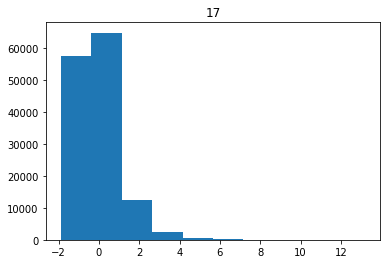

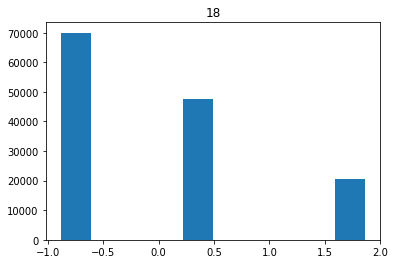

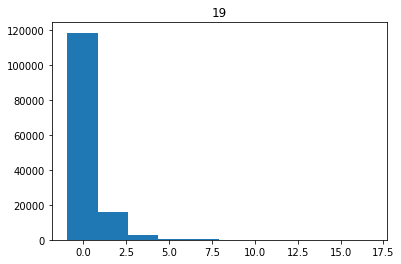

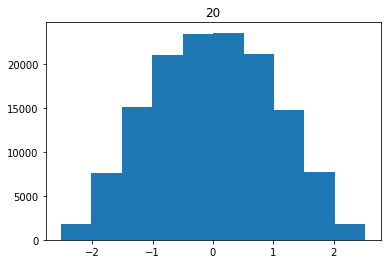

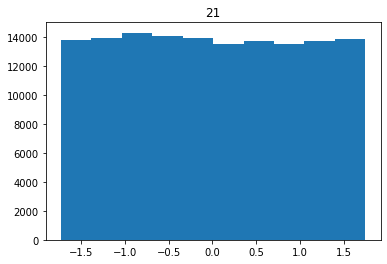

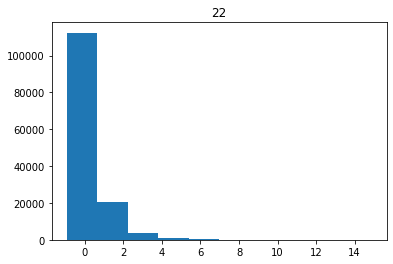

In [22]:
#just visualize the distribution of each variable
for i in range(lt70_s.shape[1]):
    plt.figure()
    plt.hist(lt70_s[:,i],)
    plt.title(str(i))

a lot of features seems to have a logarithmic distribution (0,1,2,3,5,6,7,9,12,15,17,19,22)
other have either a gaussian(4,10,13,20), or uniform (11,14,16,21) distributions
8th feature has a particular distribution where values tend to two extremes
18th features has 3 different values only

PCA

In [23]:
lt70_s_pca = PCA(lt70_s,0.01) # here we keep feature with more than 1% -> ~97% cumulated ! -> 16 features only
lt70_s_pca.shape

0.9756782544339477


(138096, 16)

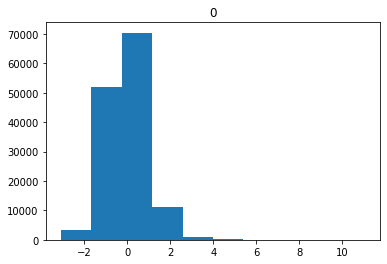

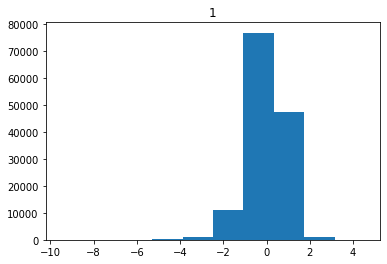

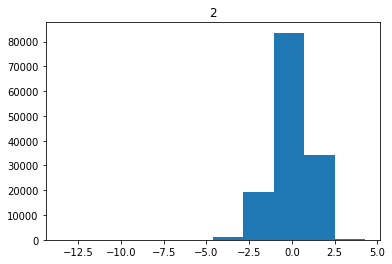

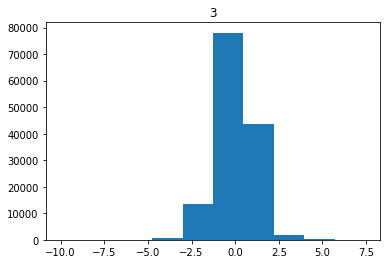

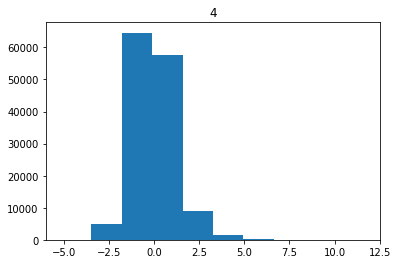

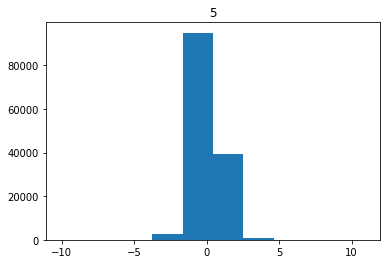

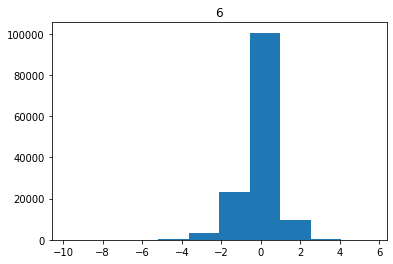

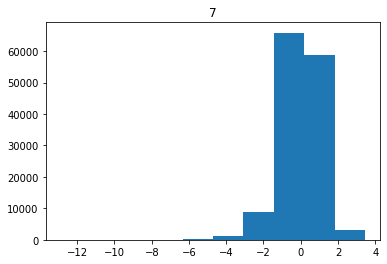

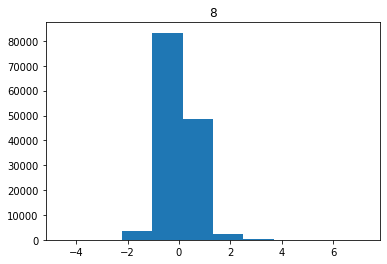

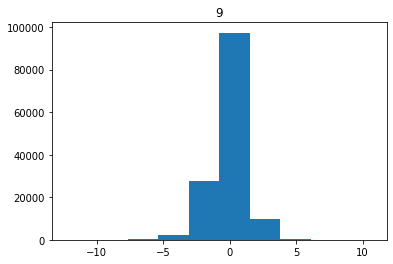

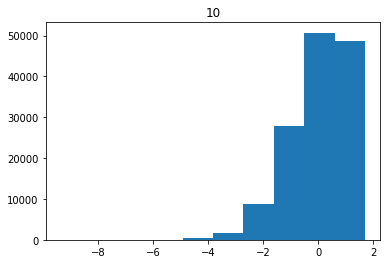

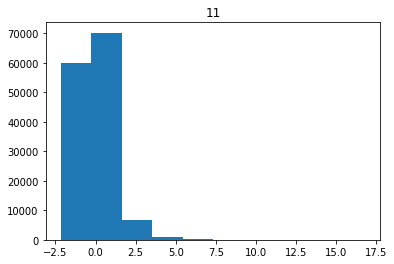

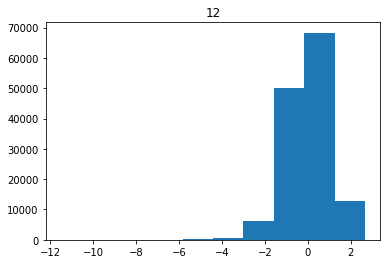

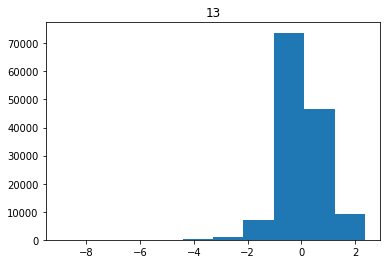

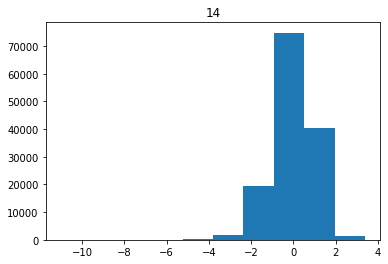

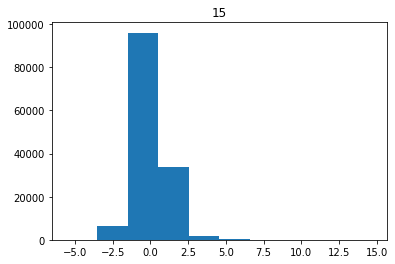

In [24]:
#to delete
for i in range(lt70_s_pca.shape[1]):
    plt.figure()
    plt.hist(lt70_s_pca[:,i],)
    plt.title(str(i))

test to change log distrib to ~gaussian

In [25]:
#log distribution found visually
listLog = [0,1,2,3,5,6,7,9,12,15,17,19,22]
lt70_s_log = lt70_s

for i in listLog:
    
    lt70_s_log = np.c_[lt70_s_log,logToGauss(lt70_s[:,i])]
    
lt70_s_log = standardize(lt70_s_log)

In [26]:
lt70_s_log_pca = PCA(lt70_s_log,0.001) # here we keep feature with more than 0.1% -> ~99% cumulated ! 
lt70_s_log_pca.shape

0.997442401558291


(138096, 30)

In [27]:
lt70_s_log.shape

(138096, 36)

In [28]:
### so, from here we have 2 main data sets to focus on 
    #clean data (threshold = 70%)      lt70_s
    #same plus log transform           lt70_s_log
    #+pca transform (but we will skip this for the moment)

In [29]:
## add columns of 1 to datasets
lt70_s = np.c_[np.ones(len(lt70_s)),lt70_s]
lt70_s_log = np.c_[np.ones(len(lt70_s_log)),lt70_s_log]
#save
np.save( 'lt70_std_one' , lt70_s )
np.save( 'lt70_std_log_one' , lt70_s_log )

In [30]:
lt70_s.shape

(138096, 24)

In [31]:
## TODO from here : 
#  -apply least square + cross validation
#  -apply other methods + cross validation
#   dont be too greedy, just see which dataset / method work the best together

fast test : apply least square on each data set and compare losses (with column of ones)

In [32]:
w_ls_1 , loss_ls_1 = least_squares( y_70_clean,lt70_s)
print('clean data 70', loss_ls_1)
w_ls_2 , loss_ls_2 = least_squares( y_70_clean,lt70_s_log)
print('clean data 70 + log',loss_ls_2)

clean data 70 0.4100695387195748
clean data 70 + log 0.3796320765405576


In [33]:
np.arange(7)

array([0, 1, 2, 3, 4, 5, 6])

In [34]:
#augmentation test
#note to run without the column of ones (singular matrix)
ds = np.arange(15)

losses = []

for d in ds:
    w_ls , loss_ls = least_squares( y_70_clean , build_poly(lt70_s,d) )
    print('degree ', d , ' : ',loss_ls)
    losses.append(loss_ls)
    
plt.plot(ds,losses)

degree  0  :  0.48919774805823374


LinAlgError: Singular matrix

interestingly we can see the minimum loss at degree 12, and then it goes mad

In [ ]:
#augmentation test with log
#note to run without the column of ones (singular matrix)

ds = np.arange(15)

losses = []

for d in ds:
    w_ls , loss_ls = least_squares( y_70_clean , build_poly(lt70_s_log,d) )
    print('degree ', d , ' : ',loss_ls)
    losses.append(loss_ls)
    
plt.plot(ds,losses)

In [ ]:
#from here
# TODO : cross validation on each data set with least square to ensure result
# TODO : compare weights of eahc data set to determine the most impactcul features
# TODO : subtract each features from the dataset and see how much it impact the loss (?)
# TODO : grid search for hyperparameters
# DONE (atleast primary tests) : augment datasets using build poly
# TODO : try all method etc...

In [ ]:
##############################################################################

## 4. Construction of model

In [ ]:
print(w_ls.shape)

In [ ]:
#dynamic gradeint descent (the gamma change following loss evolution)
wD,lossD = least_squares_GD_dynamic(y, tX, initial_w=w_ls,max_iters=10**2, gamma=10**-10,dyna=1.05)

In [ ]:
lossD

In [ ]:
#stochastic gradient descent
wSGD,lossSGD = least_squares_SGD(y, tX, initial_w=w_ls, max_iters=10**2, gamma=10**-10)

In [ ]:
lossSGD

In [ ]:
winsound.Beep(2500,500)

## Generate predictions and save ouput in csv format for submission:

In [ ]:
 # TODO: download train data and supply path here 
_, X_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [ ]:
OUTPUT_PATH = '' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, X_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)